# RNN by Tensorflow

### 데이터 준비

In [1]:
VOCAB_SIZE = 300
SEQ_LEN = 100

In [2]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) =  imdb.load_data(num_words=VOCAB_SIZE)
train_input.shape, train_target.shape, test_input.shape, test_target.shape

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 15s 1us/step


((25000,), (25000,), (25000,), (25000,))

In [3]:
train_input, test_input = train_input[:10000], test_input[:5000]
train_target, test_target = train_target[:10000], test_target[:5000]
train_input.shape, train_target.shape, test_input.shape, test_target.shape

((10000,), (10000,), (5000,), (5000,))

In [4]:
# padding 처리 (동일한 길이)
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=SEQ_LEN)
test_seq = pad_sequences(test_input, maxlen=SEQ_LEN)

train_seq.shape, test_seq.shape

((10000, 100), (5000, 100))

In [5]:
# one-hot encoding
from tensorflow.keras.utils import to_categorical

train_onehot = to_categorical(train_seq)
test_onehot = to_categorical(test_seq)

train_onehot.shape, test_onehot.shape

((10000, 100, 300), (5000, 100, 300))

### 모델 준비 및 학습

In [6]:
from tensorflow.keras import models, layers, callbacks, optimizers

input = layers.Input(shape=(SEQ_LEN, VOCAB_SIZE)) # 입력층
x = layers.SimpleRNN(units=8)(input) # 은닉층
output = layers.Dense(1, activation='sigmoid')(x) # 출력층

model = models.Model(input, output)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 300)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 8)              │         2,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,481 (9.69 KB)

 Trainable params: 2,481 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4824 - loss: 0.7036 - val_accuracy: 0.5115 - val_loss: 0.6959 - learning_rate: 0.0010
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5211 - loss: 0.6911 - val_accuracy: 0.5180 - val_loss: 0.6924 - learning_rate: 0.0010
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5630 - loss: 0.6829 - val_accuracy: 0.5235 - val_loss: 0.6914 - learning_rate: 0.0010
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5775 - loss: 0.6765 - val_accuracy: 0.5290 - val_loss: 0.6899 - learning_rate: 0.0010
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6121 - loss: 0.6627 - val_accuracy: 0.5245 - val_loss: 0.6937 - learning_rate: 0.0010
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6211 - loss: 0.6521 - val_accuracy: 0.5535 - val_loss: 0.6843 - learning_rate: 0.0010
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6441 - l

NameError: name 'plt' is not defined

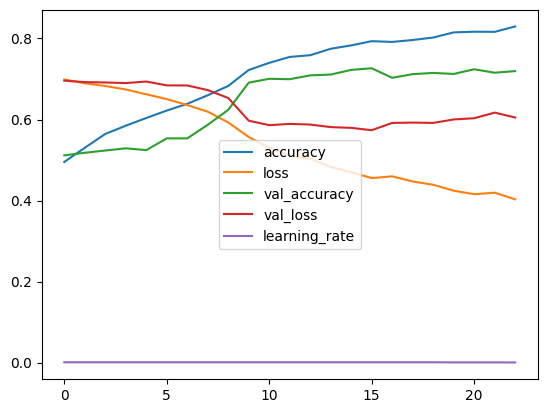

In [7]:
# 컴파일 및 학습
import pandas as pd

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_cb = callbacks.EarlyStopping(patience=7, restore_best_weights=True, verbose=1)
reduce_lr_on_plateau_cb = callbacks.ReduceLROnPlateau(patience=3, factor=0.7, verbose=1)

history = model.fit(
    train_onehot,
    train_target,
    epochs=100,
    batch_size=65,
    validation_split=0.2,
    callbacks=[early_stopping_cb, reduce_lr_on_plateau_cb])

history_df = pd.DataFrame(history.history)
history_df.plot()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_onehot, test_target)
loss, accuracy